In [6]:
from os import path
import numpy as np
import plotly.graph_objects as go
from bentdna import shapefourier
bentna_folder = '/home/yizaochen/codes/bentdna'

### Part 1: Initialize

In [7]:
workfolder = path.join(bentna_folder, 'tests')
host = 'pnas_16mer'
s_agent = shapefourier.ShapeAgent(workfolder, host)

/home/yizaochen/codes/bentdna/tests/pnas_16mer/an_folder exists


### Part 2: Read $l_i$ and $\theta$

In [8]:
s_agent.read_l_modulus_theta()

### Part 3: Filter function

In [5]:
def get_filter_df(s_agent, bp_id_0, bp_id_last, frame_id):
    mask = (s_agent.df['i'] == bp_id_0)
    df0 = s_agent.df[mask]
    mask = (df0['Frame_ID'] == frame_id)
    df1 = df0[mask]
    mask = (df1['j'].between(bp_id_0+1, bp_id_last))
    df2 = df1[mask]
    return df2

def get_theta_s_list(df):
    l_norm_list = df['|l_j|'].tolist()
    theta_data = df['theta'].tolist()
    
    n_bp = df.shape[0] + 1
    theta_list = np.zeros(n_bp)
    s_list = np.zeros(n_bp)
    
    s = 0
    for i, l_norm in enumerate(l_norm_list):
        s += l_norm
        theta_list[i+1] = theta_data[i]
        s_list[i+1] = s
    return theta_list, s_list

### Part 4: Process data

In [11]:
frame_id = 1
bp_id_0 = 3
bp_id_last = 12
df_filter = get_filter_df(s_agent, bp_id_0, bp_id_last, frame_id)
theta_list, s_list = get_theta_s_list(df_filter)

### Part 5: Make figure dictionary

In [41]:
fig_dict = {
    "data": [],
    "layout": {},
    "frames": []
}

# fill in most of layout
fig_dict["layout"]["xaxis"] = {"range": [-2, 35], "title": "s"}
fig_dict["layout"]["yaxis"] = {"title": r"$\theta(s)$  (radian)"}
fig_dict["layout"]["hovermode"] = "closest"
fig_dict["layout"]["updatemenus"] = [
    {
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 150, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": 150,
                                                                    "easing": "quadratic-in-out"}}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }
]

### Part 5: Slider control

In [42]:
sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "Frame-ID:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 150, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

In [43]:
# make data
frame_id = 1
df_filter = get_filter_df(s_agent, bp_id_0, bp_id_last, frame_id)
theta_list, s_list = get_theta_s_list(df_filter)

data_dict = {
    "x": s_list,
    "y": theta_list,
    "mode": "lines+markers"
}

fig_dict["data"].append(data_dict)

In [44]:
# make frames
frame_ids = range(1,11)
for frame_id in frame_ids:
    frame = {"data": [], "name": frame_id}
    df_filter = get_filter_df(s_agent, bp_id_0, bp_id_last, frame_id)
    theta_list, s_list = get_theta_s_list(df_filter)
    data_dict = {
        "x": s_list,
        "y": theta_list,
        "mode": "lines+markers"
    }
    frame["data"].append(data_dict)
    fig_dict["frames"].append(frame)
    slider_step = {"args": [
        [frame_id],
        {"frame": {"duration": 300, "redraw": False},
         "mode": "immediate",
         "transition": {"duration": 300}}
    ],
        "label": frame_id,
        "method": "animate"}
    sliders_dict["steps"].append(slider_step)

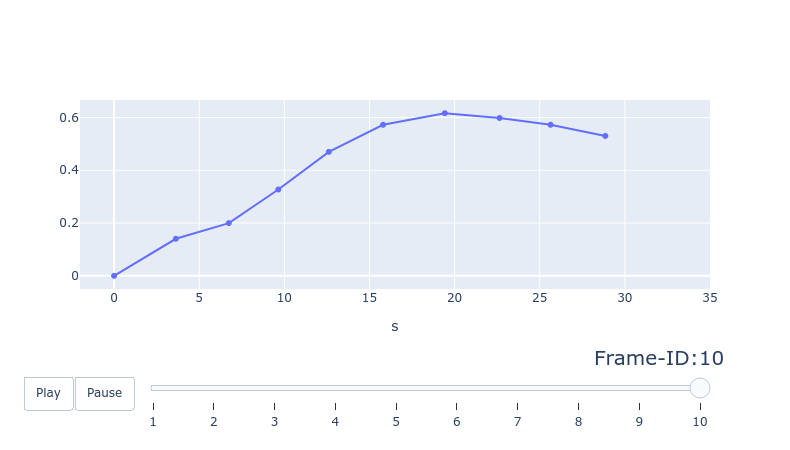

In [45]:
fig_dict["layout"]["sliders"] = [sliders_dict]
fig = go.Figure(fig_dict)
fig.show()